In [1]:
import torch
import numpy as np
#import foamFileOperation
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pdb
#from torchvision import datasets, transforms
import csv
from torch.utils.data import DataLoader, TensorDataset,RandomSampler
from math import exp, sqrt,pi
import time
from pathlib import Path
import sys
import os

import geo_train
import mesh_gen

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
epochs  = 500

Using device: cuda


In [3]:
L = 1
xStart = 0
xEnd = xStart+L
rInlet = 0.05

nPt = 100
unique_x = np.linspace(xStart, xEnd, nPt)
mu = 0.5*(xEnd-xStart)

In [4]:
N_y = 20
x_2d = np.tile(unique_x,N_y)
x_2d = np.reshape(x_2d,(len(x_2d),1))


In [5]:
nu = 1e-3

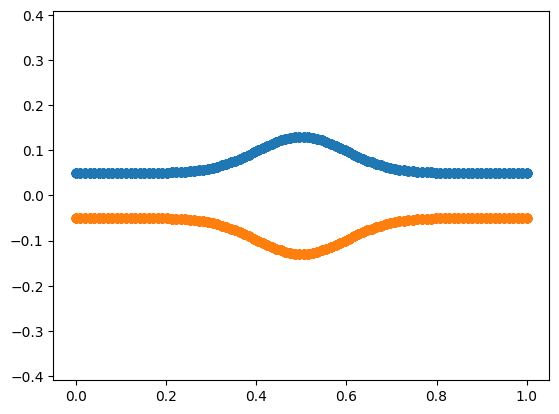

In [6]:
sigma = 0.1
## negative means aneurysm
scaleStart = -0.02
scaleEnd = 0
Ng = 50
scale_1d = np.linspace(scaleStart,scaleEnd,Ng,endpoint= True)
x,scale = mesh_gen.ThreeD_mesh(unique_x,x_2d,scale_1d,sigma,mu)


# axisymetric boundary
R = scale * 1/sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
#R = 0

# Generate stenosis
yUp = (rInlet - R)*np.ones_like(x)
yDown = (-rInlet + R)*np.ones_like(x)

idx = np.where(scale == scaleStart)

plt.figure()
plt.scatter(x[idx], yUp[idx])
plt.scatter(x[idx], yDown[idx])
plt.axis('equal')
plt.show()

In [7]:
y = np.zeros([len(x),1])
for x0 in unique_x:
	index = np.where(x[:,0]==x0)[0]
	Rsec = max(yUp[index])
	print('shape of index',index.shape)
	tmpy = np.linspace(-Rsec,Rsec,len(index)).reshape(len(index),-1)
	print('shape of tmpy',tmpy.shape)
	y[index] = tmpy

print('shape of x',x.shape)
print('shape of y',y.shape)
print('shape of scale',scale.shape)

shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of index (1000,)
shape of tmpy (1000, 1)
shape of inde

In [8]:
dP = 0.1
g = 9.8

rho = 1

Train Epoch: 0 [0/2000 (0%)]	Loss: 0.0252156015
Train Epoch: 0 [100/2000 (5%)]	Loss: 0.0098596551
Train Epoch: 0 [200/2000 (10%)]	Loss: 0.0104395198
Train Epoch: 0 [300/2000 (15%)]	Loss: 0.0094332639
Train Epoch: 0 [400/2000 (20%)]	Loss: 0.0092339329
Train Epoch: 0 [500/2000 (25%)]	Loss: 0.0090595605
Train Epoch: 0 [600/2000 (30%)]	Loss: 0.0096165743
Train Epoch: 0 [700/2000 (35%)]	Loss: 0.0097632483
Train Epoch: 0 [800/2000 (40%)]	Loss: 0.0090374006
Train Epoch: 0 [900/2000 (45%)]	Loss: 0.0091627249
Train Epoch: 0 [1000/2000 (50%)]	Loss: 0.0094713941
Train Epoch: 0 [1100/2000 (55%)]	Loss: 0.0095740696
Train Epoch: 0 [1200/2000 (60%)]	Loss: 0.0092387507
Train Epoch: 0 [1300/2000 (65%)]	Loss: 0.0092457263
Train Epoch: 0 [1400/2000 (70%)]	Loss: 0.0090110395
Train Epoch: 0 [1500/2000 (75%)]	Loss: 0.0091651613
Train Epoch: 0 [1600/2000 (80%)]	Loss: 0.0089355223
Train Epoch: 0 [1700/2000 (85%)]	Loss: 0.0087619396
Train Epoch: 0 [1800/2000 (90%)]	Loss: 0.0091242120
Train Epoch: 0 [1900/2000 

KeyError: 'loss_4'

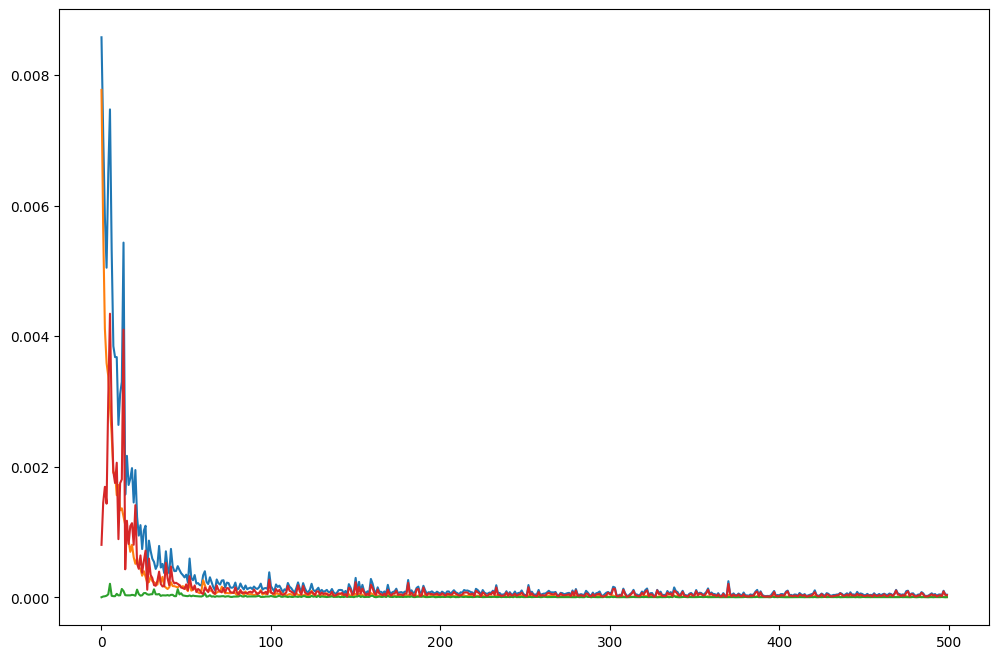

In [ ]:
batchsize = 50
learning_rate = 1e-3

path = "Cases/"

#path = pre+"aneurysmsigma01scalepara_100pt-tmp_"+str(ii)
tic = time.time()
geo_train.geo_train(device,sigma,scale,mu,xStart,xEnd,L,rInlet,x,y,R,yUp,dP,nu,rho,g,batchsize,learning_rate,epochs,path, 200)
toc = time.time()

elapseTime = toc - tic
print ("elapse time in serial = ", elapseTime)